In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
HO = pd.read_csv('data/HO.csv')
NG = pd.read_csv('data/NG.csv')

In [52]:
HO = HO.iloc[:,0:2]
NG = NG.iloc[:,0:2]
HO['Date'] = pd.to_datetime(HO['Date'])
NG['Date'] = pd.to_datetime(NG['Date'])
HO.sort_values(by='Date')
NG.sort_values(by='Date')

,Date,Close/Last
2518,2010-10-11,3.601
2517,2010-10-12,3.629
2516,2010-10-13,3.696
2515,2010-10-14,3.657
2514,2010-10-15,4.169
...,...,...
4,2020-10-05,2.615
3,2020-10-06,2.520
2,2020-10-07,2.606
1,2020-10-08,2.627


In [53]:
HO.set_index('Date', inplace=True)
NG.set_index('Date', inplace=True)

HO.columns = ['Close']
NG.columns = ['Close']

HO['Close'] = pd.to_numeric(HO['Close'] , errors='coerce')
NG['Close'] =  pd.to_numeric(NG['Close'] , errors='coerce')

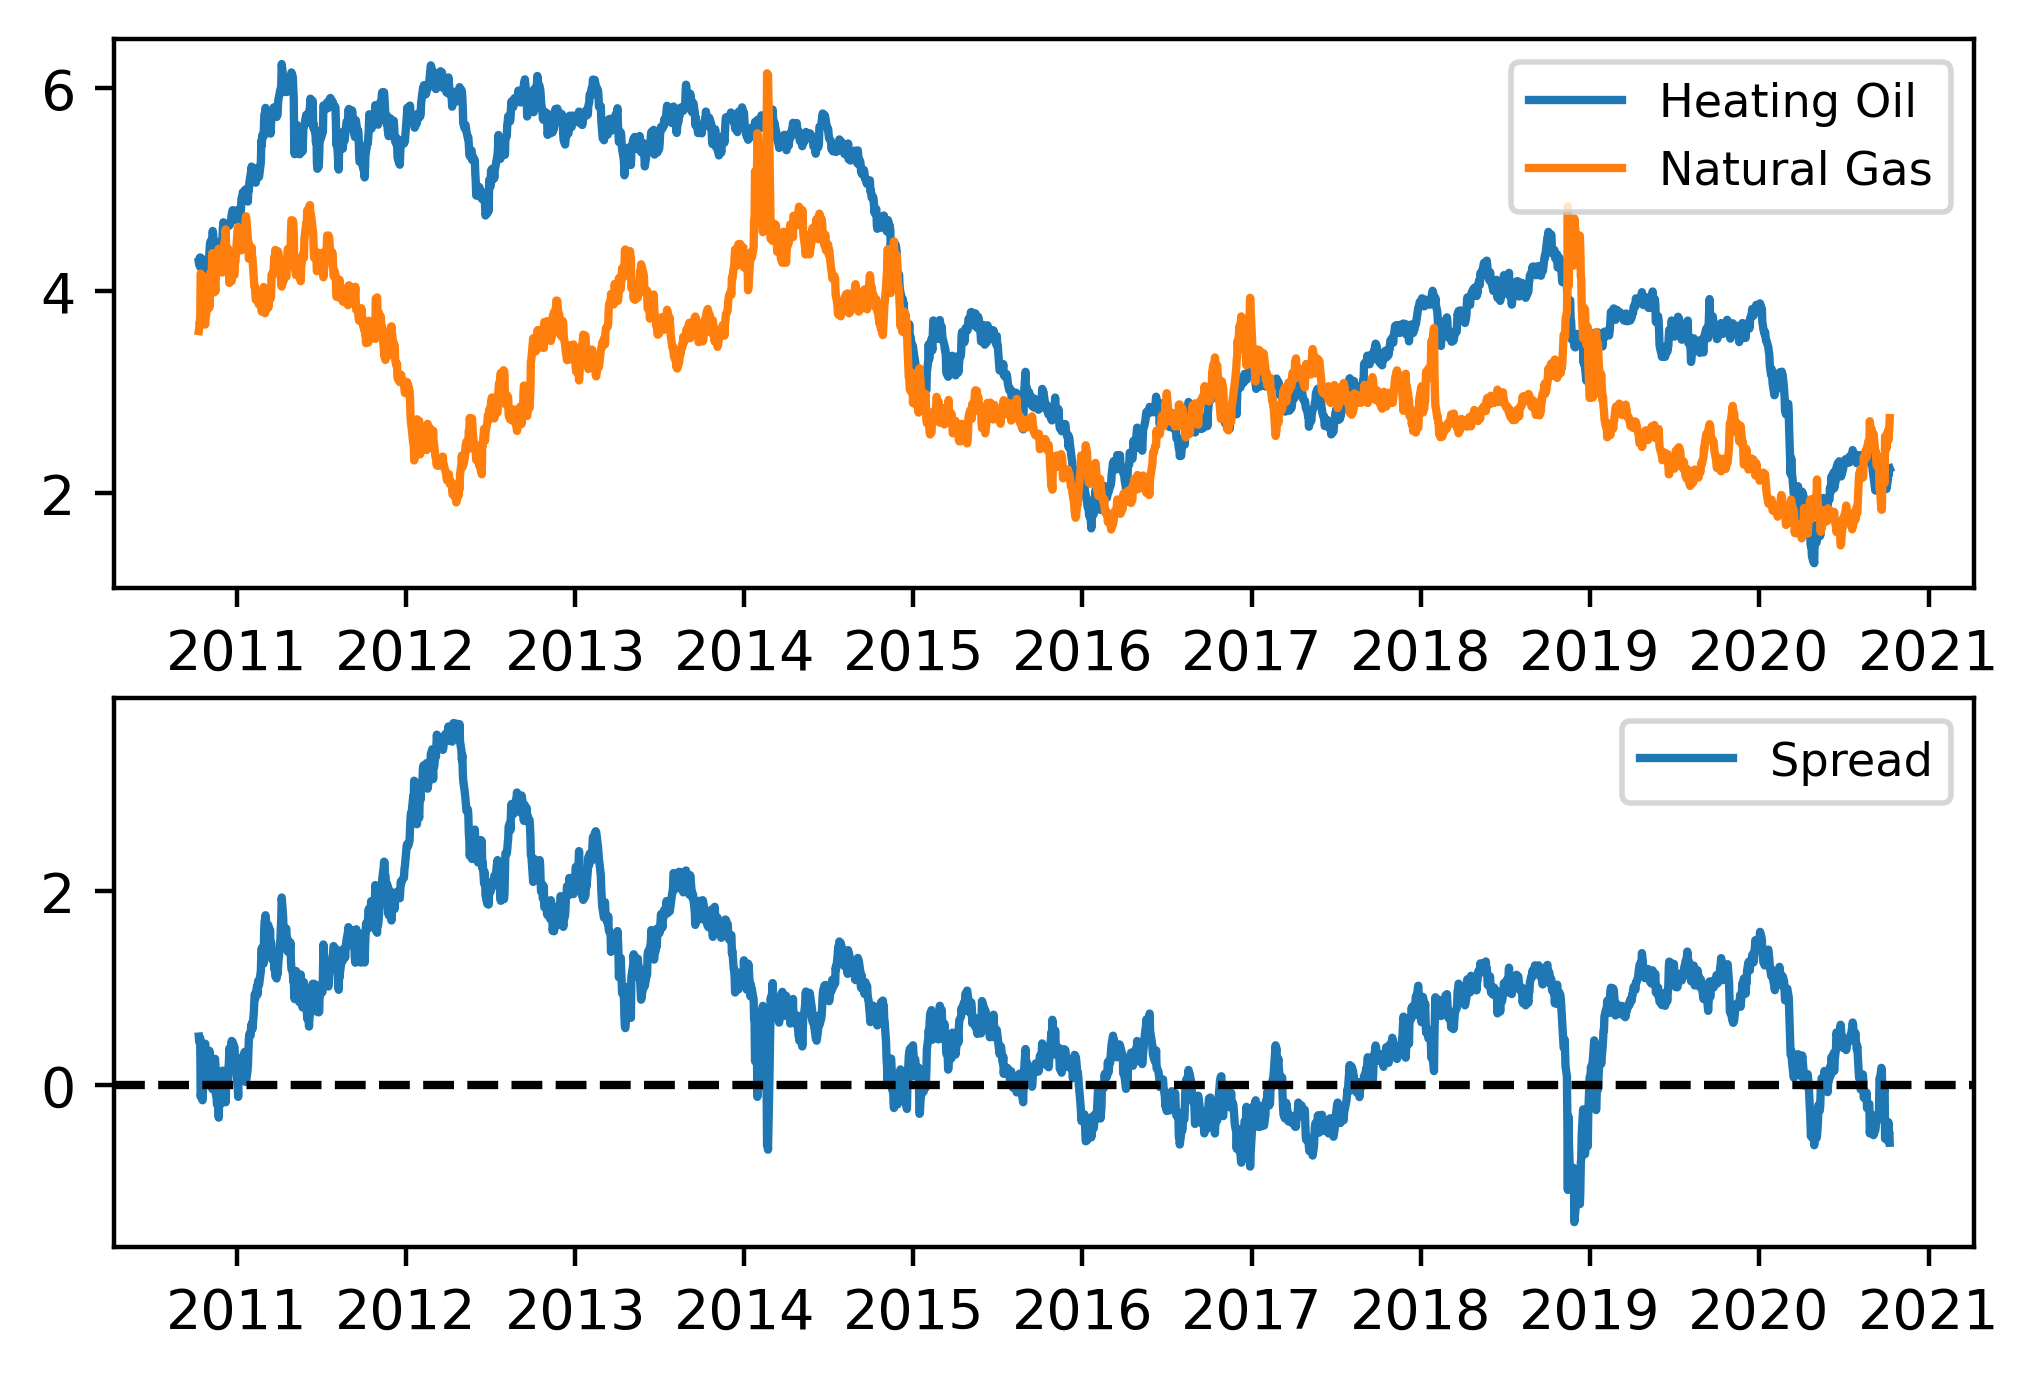

In [54]:
plt.subplot(2,1,1)
plt.plot(1.88*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')


plt.subplot(2,1,2)
plt.plot(1.8*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

In [55]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

The p-value for the ADF test on HO is  0.44783918345215085
The p-value for the ADF test on NG is  0.17700499969422084


In [56]:
result_spread = adfuller(1.8*HO['Close'] - NG['Close'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on the spread is  0.044712361429699574


In [57]:
BTC = pd.read_csv('data/BTCUSD.csv')
ETH = pd.read_csv('data/ETHUSD.csv')

In [58]:
BTC.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-10,243.740005,245.319000,243.074005,244.940994,244.940994,15912700.0
1,2015-10-11,244.742004,247.242996,244.151993,247.050003,247.050003,16827300.0
2,2015-10-12,246.875000,247.453995,245.179001,245.307999,245.307999,17388300.0
3,2015-10-13,245.199997,250.235992,243.757004,249.507996,249.507996,28198500.0
4,2015-10-14,249.492996,254.274994,248.903000,251.988998,251.988998,27462600.0


In [59]:
BTC = BTC[['Date', 'Adj Close']]
ETH = ETH[['Date', 'Adj Close']]
BTC['Date'] = pd.to_datetime(BTC['Date'])
ETH['Date'] = pd.to_datetime(ETH['Date'])
BTC.sort_values(by='Date')
ETH.sort_values(by='Date')

,Date,Adj Close
0,2015-10-12,0.626030
1,2015-10-13,0.607655
2,2015-10-14,0.522968
3,2015-10-15,0.561878
4,2015-10-16,0.536495
...,...,...
1300,2020-10-05,NaN
1301,2020-10-06,NaN
1302,2020-10-07,NaN
1303,2020-10-08,NaN


In [60]:
BTC.set_index('Date', inplace=True)
ETH.set_index('Date', inplace=True)

BTC.columns = ['BTC']
ETH.columns = ['ETH']

BTC['BTC'] = pd.to_numeric(BTC['BTC'] , errors='coerce')
ETH['ETH'] =  pd.to_numeric(ETH['ETH'] , errors='coerce')

In [61]:
stocks = BTC.join(ETH, how='outer')

In [62]:
stocks

,BTC,ETH
Date,,
2015-10-10,244.940994,NaN
2015-10-11,247.050003,NaN
2015-10-12,245.307999,0.626030
2015-10-13,249.507996,0.607655
2015-10-14,251.988998,0.522968
...,...,...
2020-10-06,10621.664063,NaN
2020-10-07,10679.136719,NaN
2020-10-08,10923.627930,NaN


In [63]:
stocks['BTC'] = stocks['BTC'].interpolate()
stocks['ETH'] = stocks['ETH'].interpolate()

In [64]:
stocks = stocks[2:]

In [65]:
ETH = stocks[['ETH']]
BTC = stocks[['BTC']]

In [16]:
ETH.columns = ['Price']
BTC.columns = ['Price']

In [17]:
BTC

,Price
Date,
2015-10-12,245.307999
2015-10-13,249.507996
2015-10-14,251.988998
2015-10-15,254.320007
2015-10-16,262.868988
...,...
2020-10-06,10621.664063
2020-10-07,10679.136719
2020-10-08,10923.627930


In [18]:
BTC = BTC['2015-10-12':'2017-10-20']
ETH = ETH['2015-10-12':'2017-10-20']

In [20]:
import statsmodels.api as sm
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC,ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])

The p-value for the ADF test is  0.7868835101546974


In [21]:
adf_stats = adfuller(stocks.BTC - b*stocks.ETH)
print("The p-value for the ADF test is ", adf_stats[1])

The p-value for the ADF test is  0.24565030430662416


In [66]:
DATE = np.arange(1870, 2017, 1)
TAVG = [[53.8],
       [51.3],
       [51.3],
       [50.9],
       [51.3],
       [49.4],
       [51.9],
       [52.8],
       [53.6],
       [52.1],
       [52.9],
       [52.2],
       [51.7],
       [50.2],
       [52.2],
       [50.6],
       [51.3],
       [50.9],
       [49.4],
       [52.8],
       [53. ],
       [54.1],
       [52.2],
       [50.7],
       [52.9],
       [53. ],
       [53.6],
       [53.6],
       [55.1],
       [53.9],
       [54.2],
       [52.4],
       [53. ],
       [53. ],
       [50.9],
       [53.4],
       [55. ],
       [52.9],
       [55. ],
       [53.7],
       [53.5],
       [53.4],
       [52.7],
       [54.9],
       [51.9],
       [53.4],
       [52.2],
       [50.7],
       [53.1],
       [53.8],
       [52.2],
       [54.8],
       [53.5],
       [52.8],
       [51.9],
       [53.4],
       [51.2],
       [53.4],
       [53.5],
       [54.1],
       [54.5],
       [55.8],
       [55.1],
       [54.2],
       [52.9],
       [53. ],
       [53.4],
       [54.4],
       [55.2],
       [54.6],
       [51.9],
       [54.9],
       [54. ],
       [53.7],
       [54.6],
       [54.1],
       [55.3],
       [53.7],
       [54. ],
       [56.9],
       [53.6],
       [54.9],
       [55.8],
       [57. ],
       [54.9],
       [54.6],
       [53.5],
       [55.4],
       [52.5],
       [55.4],
       [54. ],
       [55. ],
       [53.4],
       [53.5],
       [54.5],
       [54.2],
       [55. ],
       [52.9],
       [54. ],
       [54.8],
       [54.2],
       [55.2],
       [53.8],
       [56. ],
       [54.7],
       [54.9],
       [53.3],
       [54.3],
       [52.9],
       [55.7],
       [54.9],
       [55.2],
       [54.8],
       [56. ],
       [55.4],
       [55.5],
       [55.2],
       [55.1],
       [54.8],
       [53.9],
       [57.2],
       [57.2],
       [53.9],
       [55.5],
       [55.2],
       [55.3],
       [53.7],
       [54.3],
       [57.1],
       [56.5],
       [53.8],
       [56.2],
       [56.4],
       [53.4],
       [54.5],
       [55.7],
       [56.8],
       [55. ],
       [55.3],
       [54. ],
       [56.7],
       [56.4],
       [57.3],
       [55.3],
       [54.4],
       [56.7],
       [57.2]]
TAVG = [i.pop() for i in TAVG]
dic = {'Date':DATE, 'TAVG':TAVG}
temp_NY =pd.DataFrame(dic)

In [67]:
temp_NY

,Date,TAVG
0,1870,53.8
1,1871,51.3
2,1872,51.3
3,1873,50.9
4,1874,51.3
...,...,...
142,2012,57.3
143,2013,55.3
144,2014,54.4
145,2015,56.7


In [68]:
temp_NY.set_index('Date', inplace=True)

In [69]:
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')


In [70]:
temp_NY['TAVG'] = pd.to_numeric(temp_NY['TAVG'])

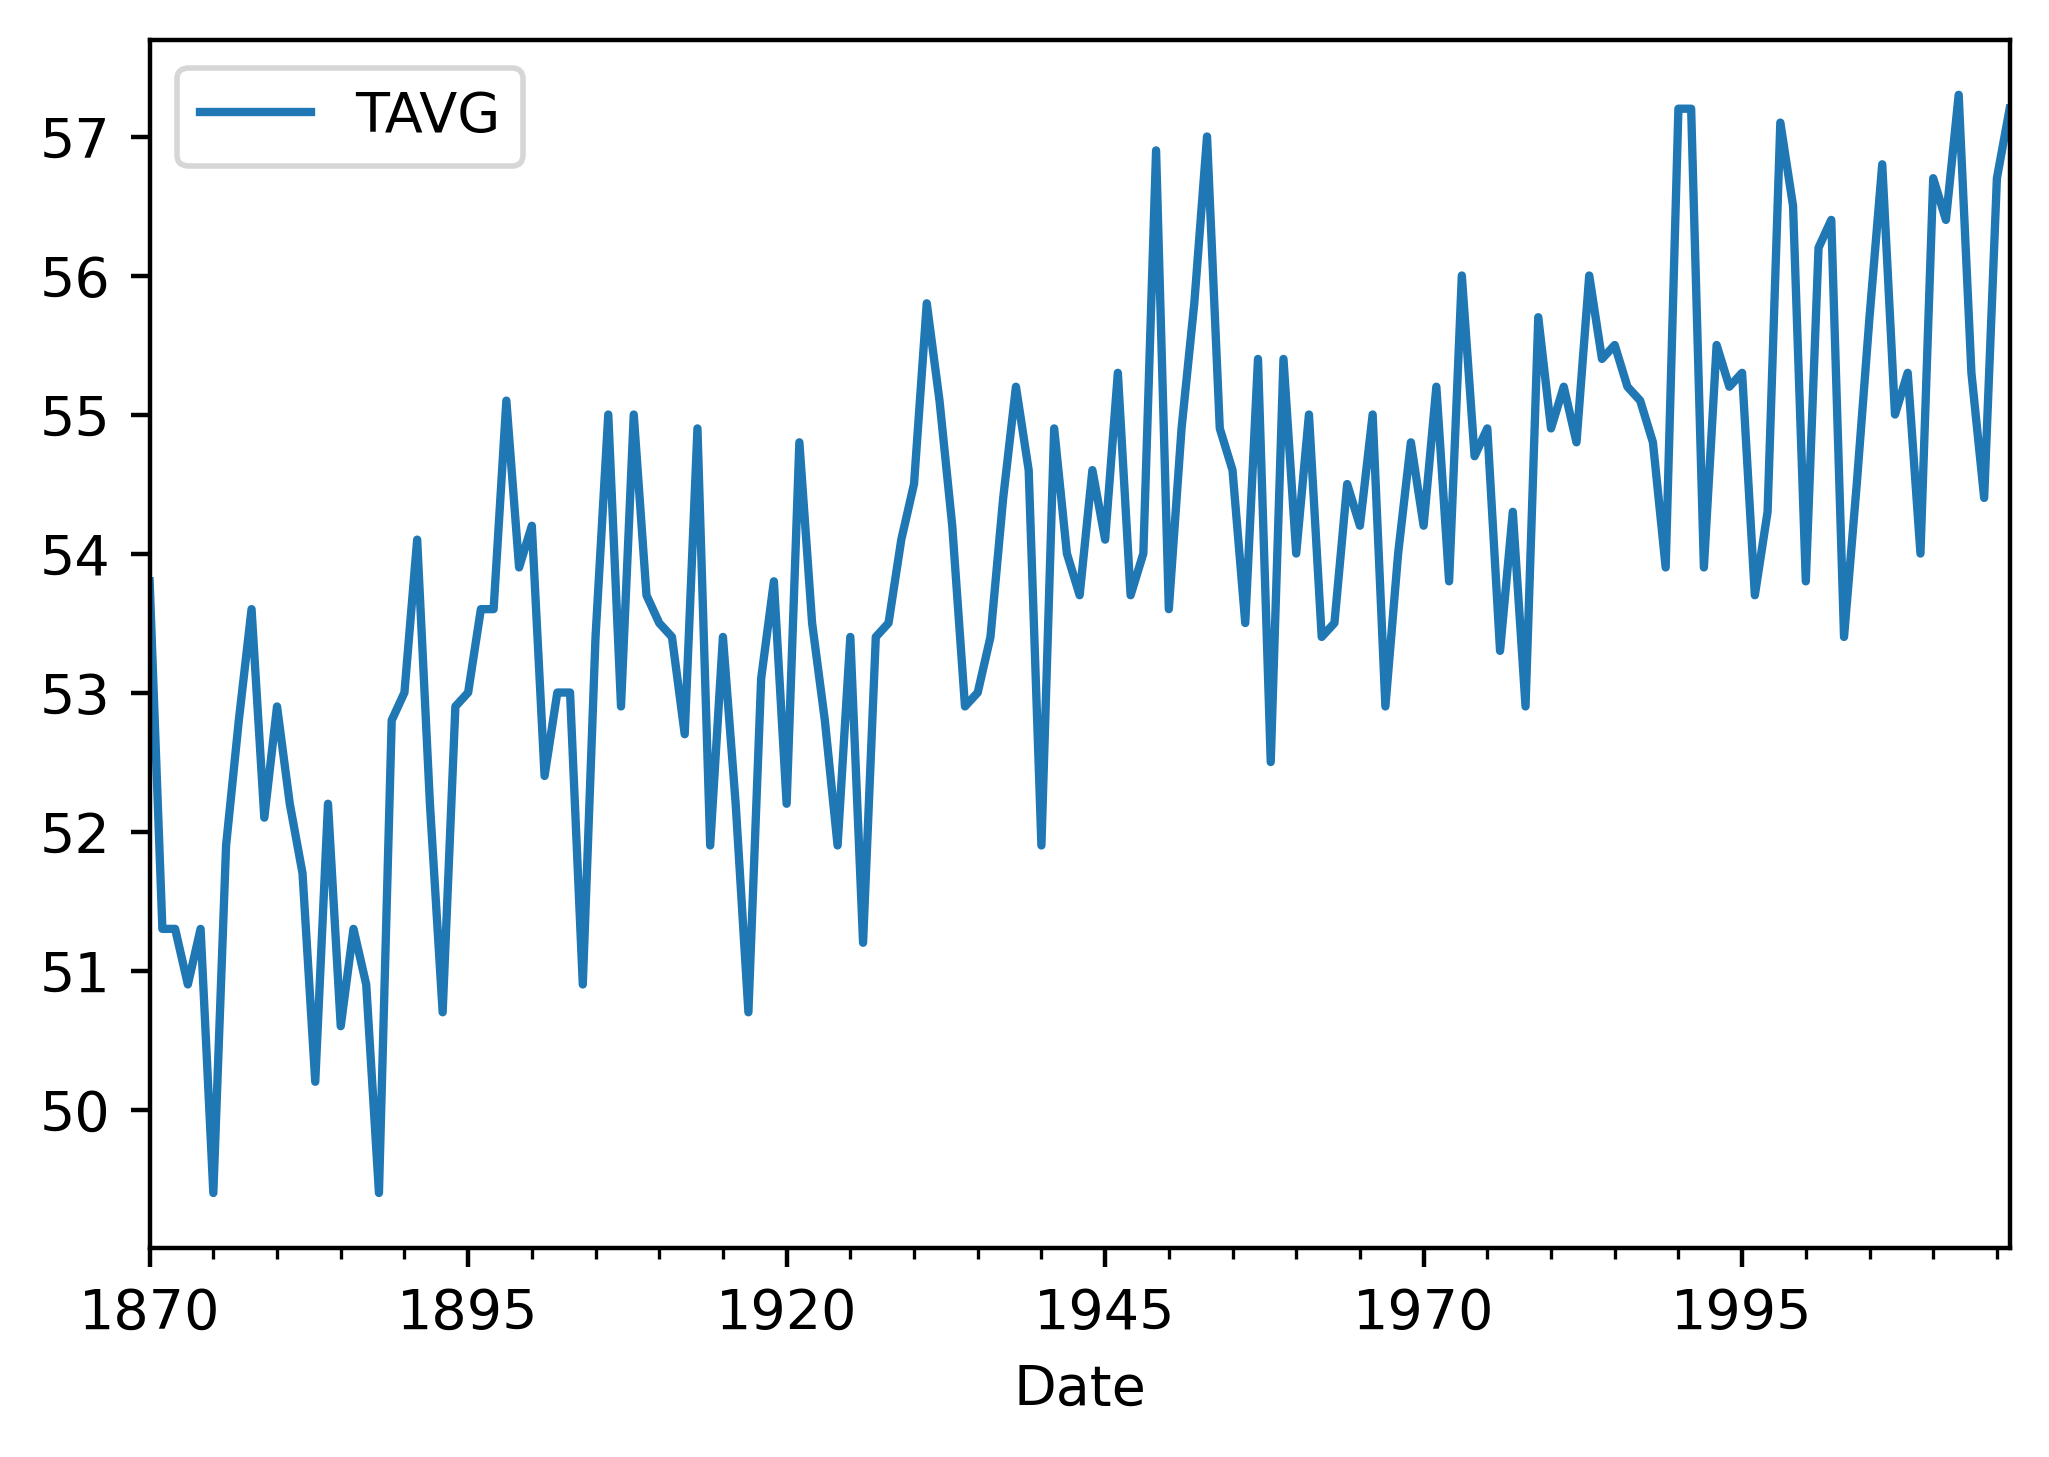

The p-value for the ADF test is  0.5832938987871136


In [71]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller


# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()
chg_temp

,TAVG
Date,
1871-01-01,-2.5
1872-01-01,0.0
1873-01-01,-0.4
1874-01-01,0.4
1875-01-01,-1.9
...,...
2012-01-01,0.9
2013-01-01,-2.0
2014-01-01,-0.9


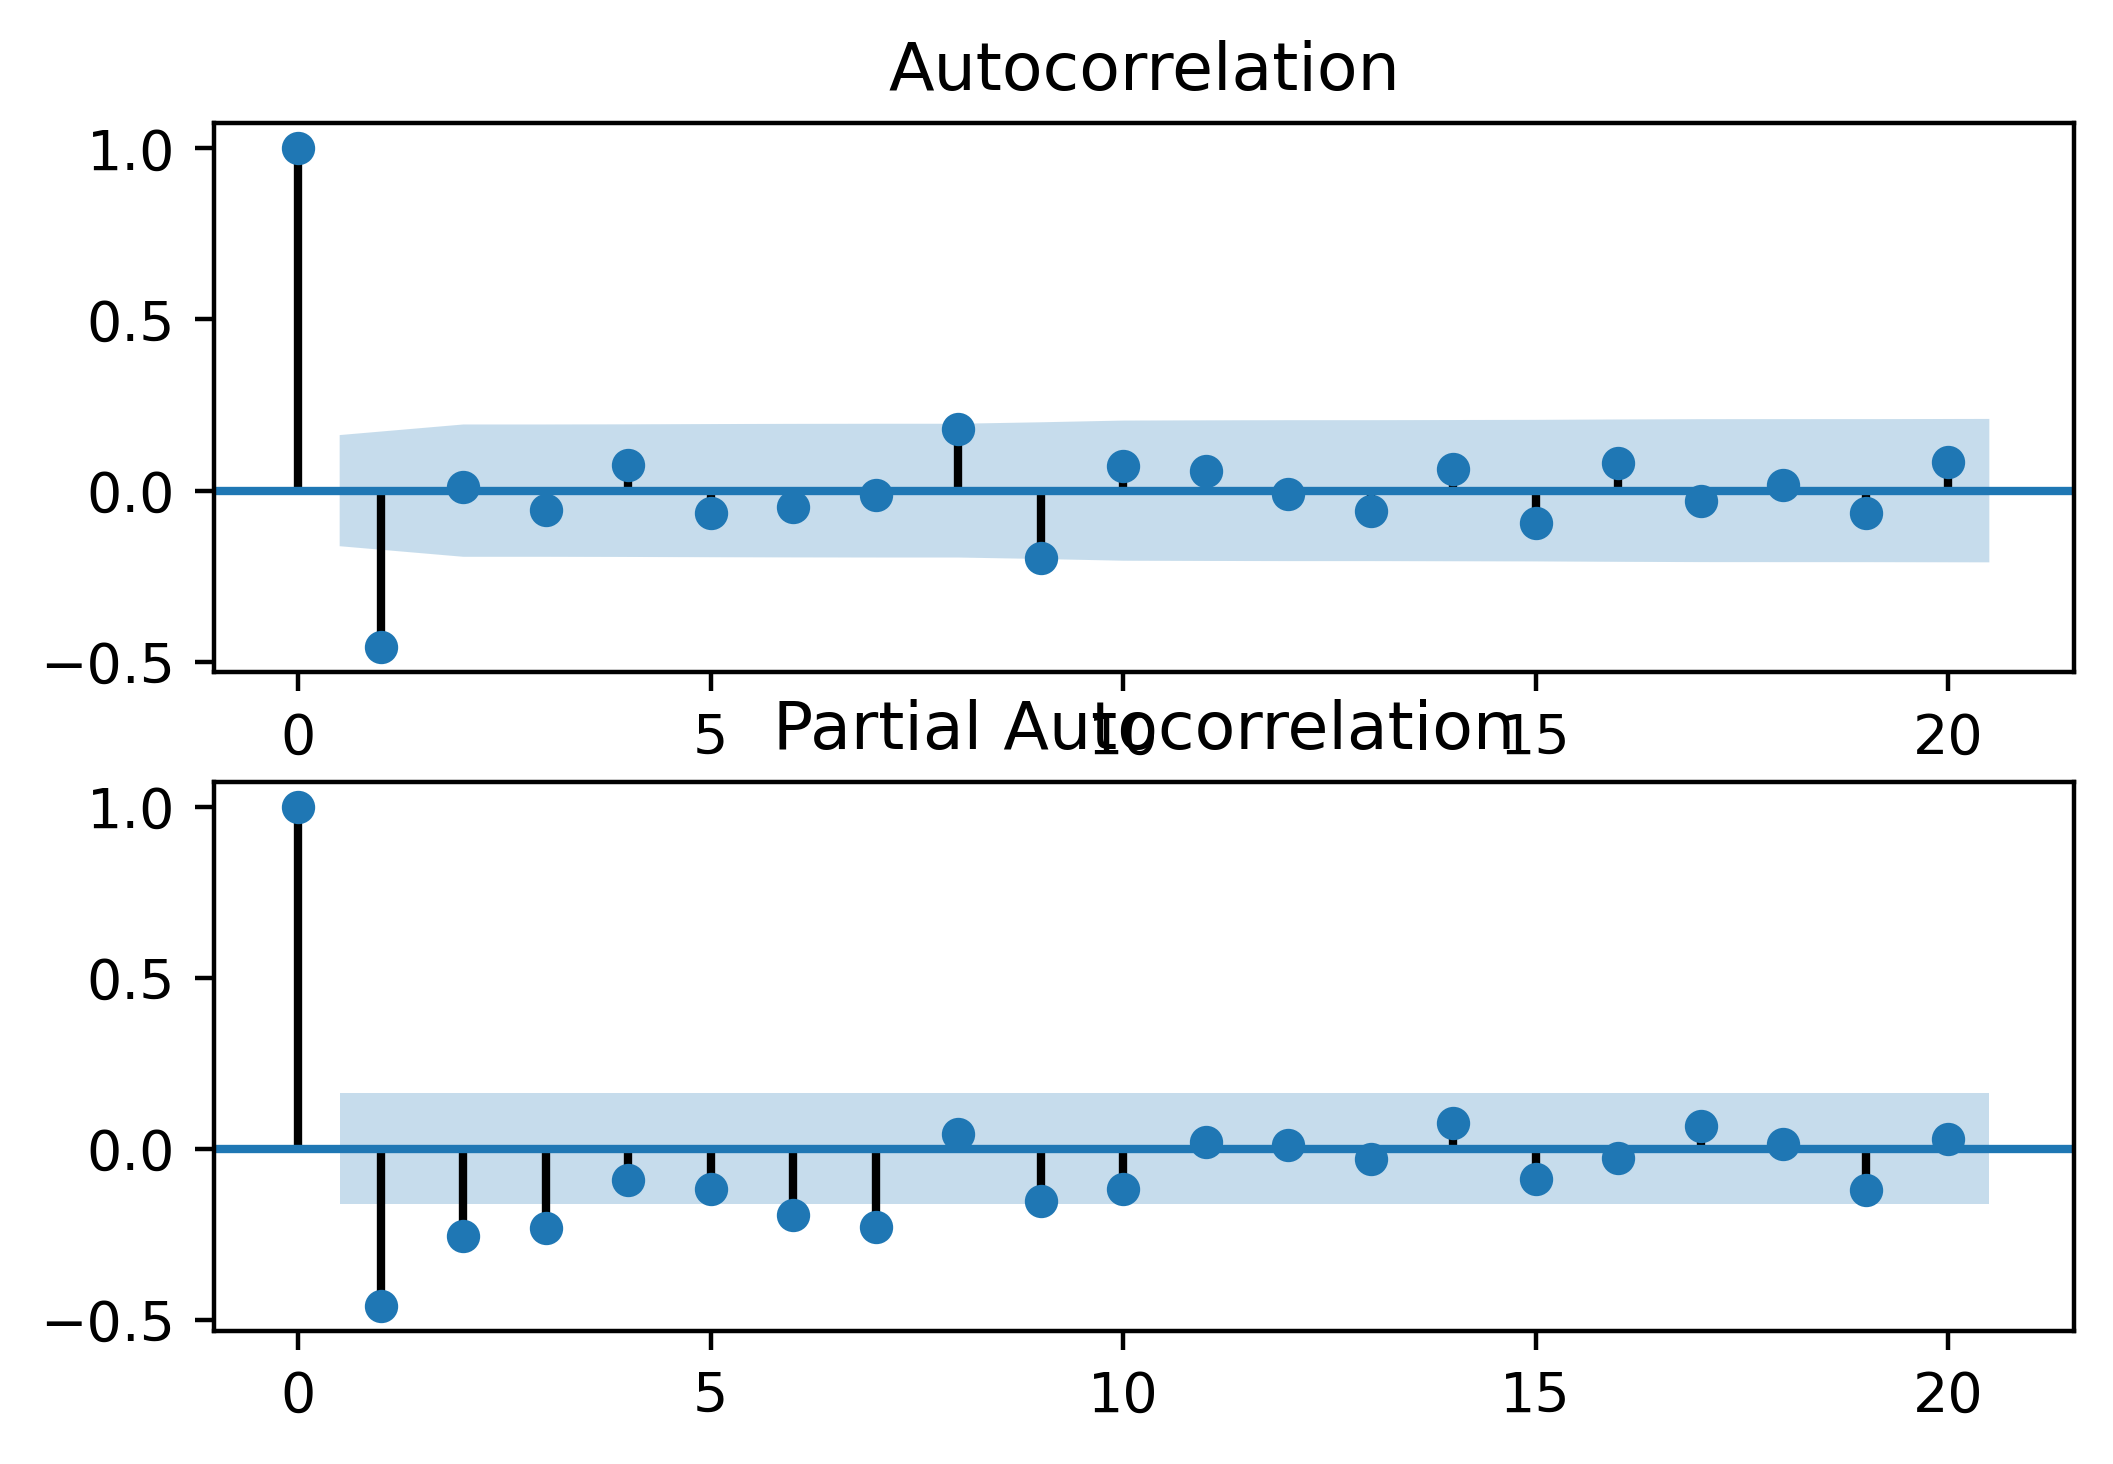

In [73]:
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

In [74]:
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARMA(chg_temp, order=(1,0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

The AIC for an AR(1) is:  510.534689831391


C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-

In [75]:

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARMA(chg_temp, order=(2,0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

The AIC for an AR(2) is:  501.92741231602264


C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [76]:

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARMA(chg_temp, order=(1,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


The AIC for an ARMA(1,1) is:  469.0729116216273


C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-

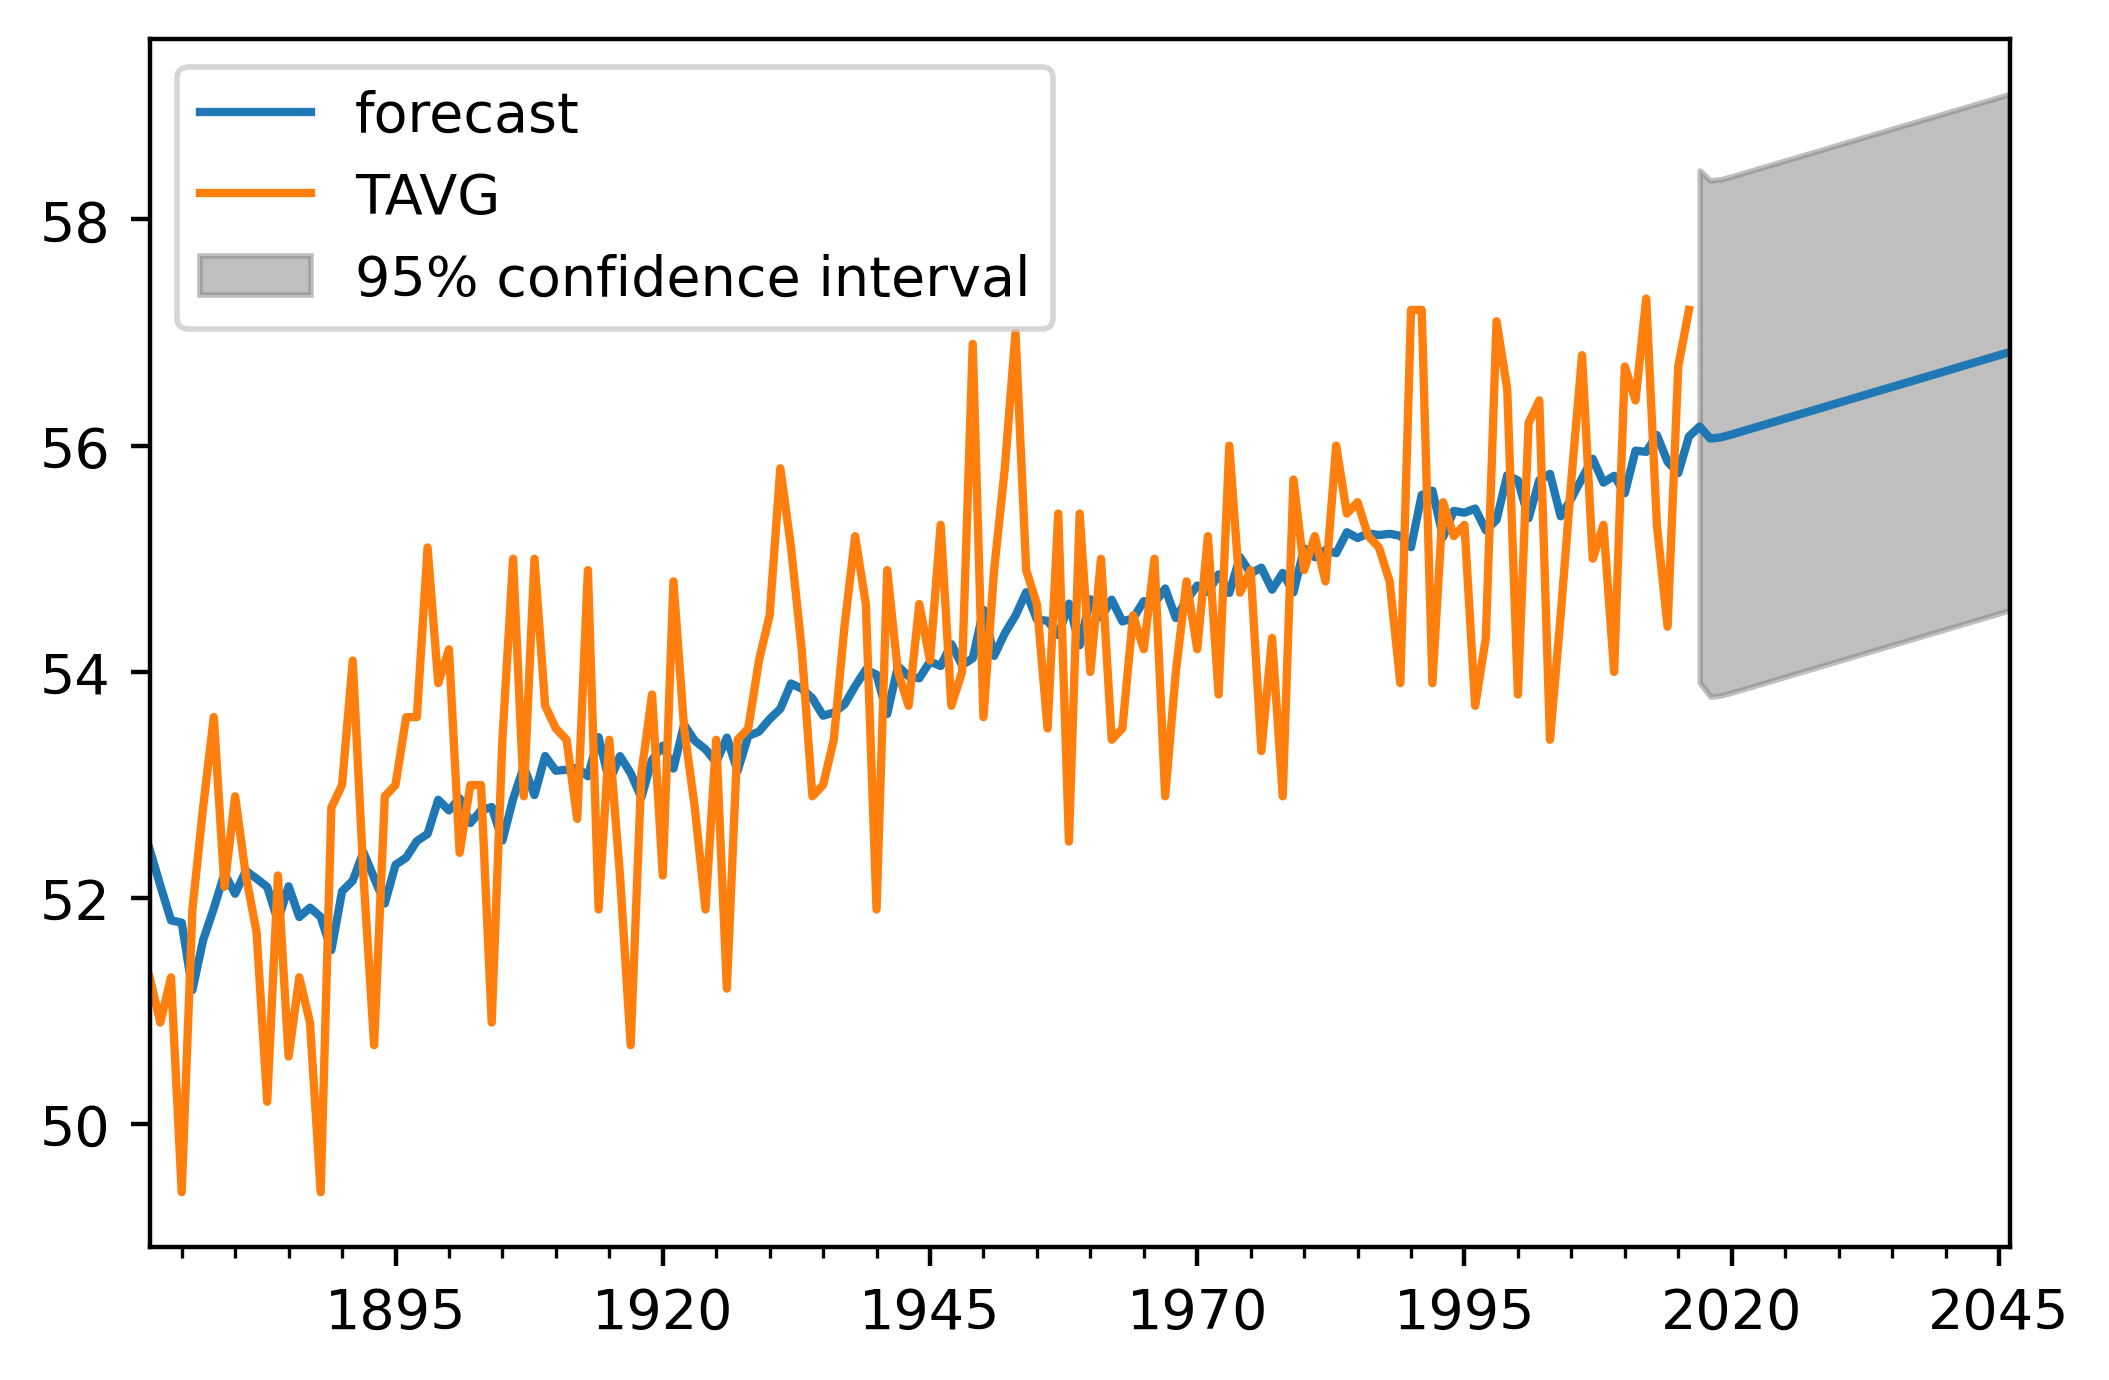

In [77]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()